# Ejercicio de eliminación de anomalías de la imagen
Autor: Guerrero Deschamps, Raúl  
Fecha: 28/06/2021  
Asignatura: Percepción Computacional  
Notebook: https://nbviewer.jupyter.org/github/raul-guerrero/EliminacionAnomalias/blob/master/notebooks/EliminacionAnomalias.ipynb  
GitHub: https://github.com/raul-guerrero/EliminacionAnomalias

## Descripción del problema
La generación y detección de rayos X para la toma de radiografías diagnósticas, debido a que la emisión de los fotones de rayos X desde un cátodo, que atraviesa un cuerpo hacia un ánodo, es un proceso de captación de particulas por naturaleza aleatorias.

De igual forma, las partículas de rayos X, en parte son absorbidas por el cuerpo que las recibe, y otras absorbidas por el detector de imagen, hace que dicho detector capture ruido proveniente tanto de la distribución espacial de las partículas, como de la misma calidad interna del detector, y el sustrato en el cual se imprime lo detectado.

Debido a lo antes mencionado, las variaciones en la señal en exámenes donde se expone un cuerpo a bajos niveles de radiación, genera lo que es conocido como ruido estadístico de tipo "sal y pimienta", lo cual causa la reducción visual, aunque sutil, pero lo suficientemente relevante para potenicalmente causar afectaciones importantes en la confianza del diagnóstico.

## Solución propuesta
Se implementará un filtro de eliminación de ruido estadístico "de mediana" en la señal conocido como "sal y pimienta", el cual debe permitir ajustar la resolución de dicho filtro al cambiar la cantidad de muestras a tomar en cuenta (la máscara) al aplicar el cálculo de mediana en los grupos muestreados pertenecientes a la imagen, así, dependiendo de la cantidad de ruido eliminado por el filtro ajustado manualmente por el usuario, puede decidir hasta qué grado el filtro mejora o empeora la confianza de la evaluación y posterior diagnóstico del paciente.

## Ejecución comentada paso a paso

1. Se incluyen las librerías para leer y escribir imágenes de radiografías en escala de grises, para después implementar y ejecutar el filtro de sal y pimienta.

In [13]:
import os
import numpy as num
import cv2 as cv
from PIL import Image as im
from IPython.display import display

2. Define una función que muestra en pantalla la radiografía original y la filtrada, para posteriormente hacer el comparativo de los resultados de manera visual.

In [14]:
# Despliega en el Notebook el nombre de una radiografía a comparar
# y despliega la radiografía antes y después de la corrección
def mostrarComparativaRadiografia(nombre, antes, despues):
    # mostramos las imágenes de antes y después
    print("Imagen " + nombre + "\n")
    print("Antes del filtro:\n")
    display(im.fromarray(antes))
    print("Después del filtro:\n")
    display(im.fromarray(despues))

3. Define la función que implementa el filtro de mediana "sal y pimienta" que permitirá ejecutar dicho filtro sobre una radiografía, y al terminar la aplicación del filtro, mostrará en pantalla los resultados usando la función definida en el paso 2.  
El algoritmo requiere que se defina un tamaño de muestra de píxeles para calcular la mediana y hacer la corrección llamado máscara, dicha máscara es configurable a través de los parámetros de la función, lo que permitirá hacer diferences ajustes por el usuario para decidir que resolución del filtro es la más adecuada para el tipo de evaluación requerida.

In [15]:
# Ejecuta el filtro de mediana en una radiografía, por defecto la máscara de mediana
# es de 3x3 píxeles, pero puede ser ajustado mediante los parámetros
#
# Parámetros:
#
# imagen: es el path del archivo donde está la radiografía
# anchoMascara: es el ancho de la máscara que se usará para sacar la mediana del filtro
# altoMascara: es el alto de la máscara que se usará para sacar la mediana del filtro

def filtroDeMediana(imagen, anchoMascara = 3, altoMascara = 3):

    # Obtener la imagen y su tamaño
    radiografia = cv.imread(imagen, cv.IMREAD_GRAYSCALE)
    ancho, alto = radiografia.shape

    # Se crea una imagen del mismo tamaño en la que se almacenará el resultado
    resultado = num.zeros([ancho, alto])

    # Se aplica el filtro de mediana, la máscara recorrerá la imagen de izquierda a derecha
    # y de arriba a abajo (como se lee y escribe en español)
    for altoPixel in range(alto):
        for anchoPixel in range(ancho):
            mascara = num.zeros(anchoMascara * altoMascara)
            k = 0
            for i in range(anchoMascara):
                for j in range(altoMascara):
                    if anchoPixel + i < ancho - 1 and altoPixel + j < alto - 1:
                        mascara[k] = radiografia[anchoPixel + i, altoPixel + j]
                    # esta validación nos permite llegar al final de la imagen evitando error de out of bounds
                    else:
                        mascara[k] = radiografia[anchoPixel, altoPixel]
                    k += 1

            # Se calcula la mediana de la matriz de pixeles en la máscara
            # y se reemplaza el píxel original por la mediana calculada
            mascara = sorted(mascara)
            resultado[anchoPixel, altoPixel] = mascara[int((len(mascara)) / 2)]

    # nos aseguramos que la imagen no contenga tipo Any requerido por OpenCV
    # que todos los valores sean enteros de 8 bits sin signo (escala de grises)
    resultado = resultado.astype(num.uint8)

    #imprimimos la comparativa de la radiografía
    mostrarComparativaRadiografia(imagen, radiografia, resultado)

## Imágenes de ejemplo
Hacemos corrección usando filtro de mediana con una máscara de 3x3.  
Para este caso, aunque la resolución de máscara de 3x3 es ideal para la radiografía de cráneo, no tiene el suficiente nivel de corrección para mejorar el nivel de detealle de las demás.

Imagen data/craneo.png

Antes del filtro:



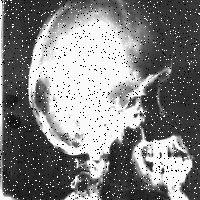

Después del filtro:



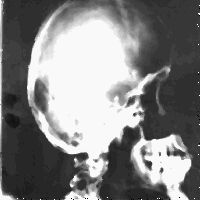

Imagen data/mamograma.png

Antes del filtro:



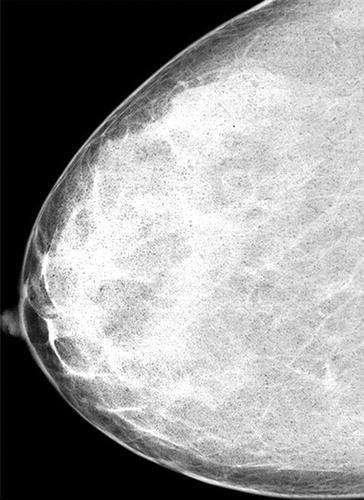

Después del filtro:



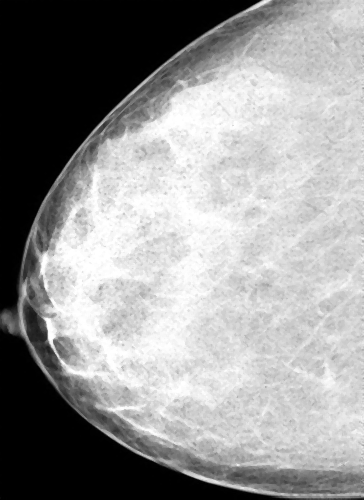

Imagen data/torax.png

Antes del filtro:



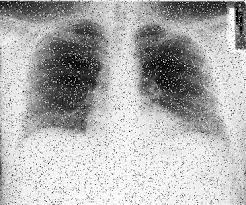

Después del filtro:



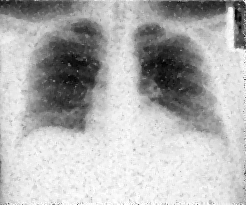

Imagen data/Zona-de-Looser.png

Antes del filtro:



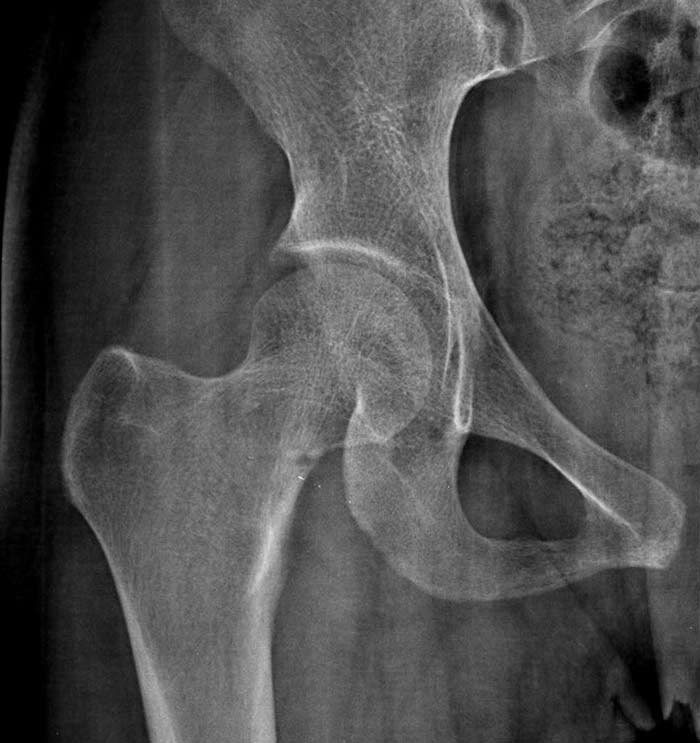

Después del filtro:



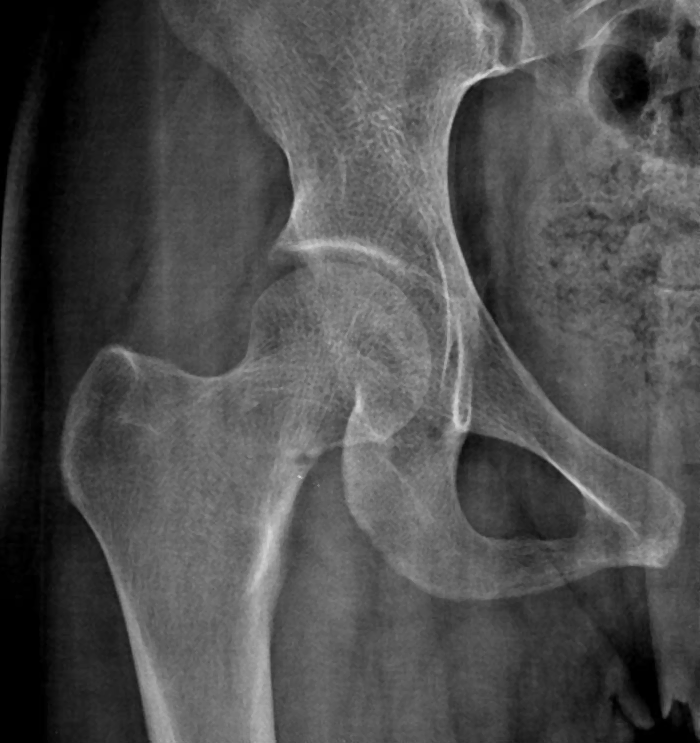

In [16]:
radiografias = os.listdir("data")
for r in radiografias: filtroDeMediana("data/" + r)

Hacemos corrección usando filtro de mediana con una máscara de 5x5.  
El nivel de resolución de máscara de 5x5 píxeles, ayudó a mejorar las radiografías de cráneo, mama y de tórax, pero dejando un nivel de corrección mínimo en la radiografía de la zona de Looser, la cual, al estar lo suficientemente clara por sí sola, es lo suficientemente útil para obtener un buen diagnóstico.

Imagen data/craneo.png

Antes del filtro:



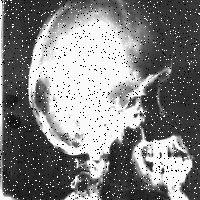

Después del filtro:



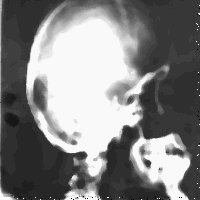

Imagen data/mamograma.png

Antes del filtro:



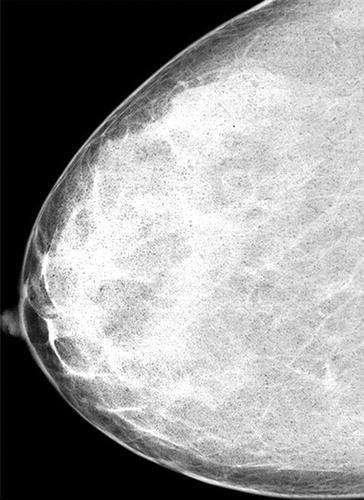

Después del filtro:



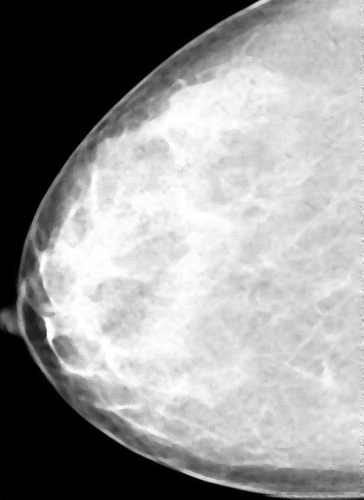

Imagen data/torax.png

Antes del filtro:



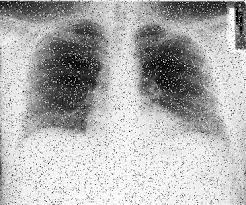

Después del filtro:



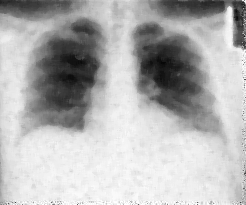

Imagen data/Zona-de-Looser.png

Antes del filtro:



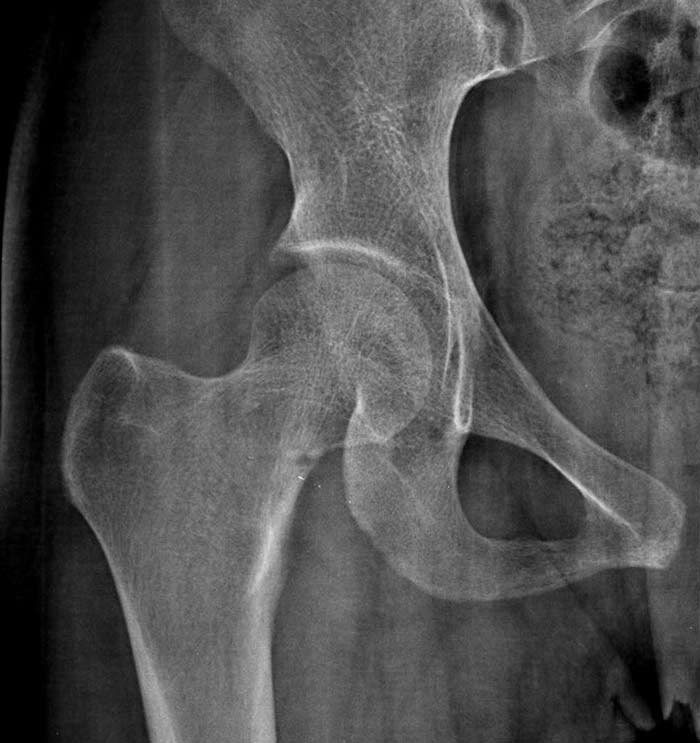

Después del filtro:



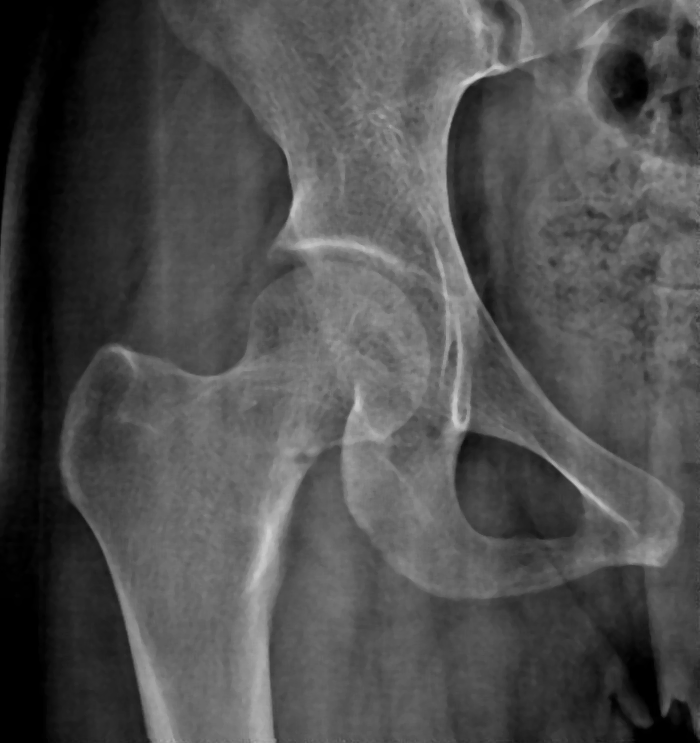

In [17]:
for r in radiografias: filtroDeMediana("data/" + r, 5, 5)

Hacemos corrección usando filtro de mediana con una máscara de 9x9.  
En este caso, la resolución de 9x9 píxeles de máscara es demasiado grande, al grado que la radiografía de cráneo empieza a perder la calidad sobre los bordes óseos, la de mama aunque se resaltan aun más los conductos lactíferos, se pierde el ligamento suspensorio, la de tórax pierde la marca de la circunferencia de los pulmones, disminuyendo en todas éstas radiografías el nivel de confianza para diagnóstico.  
Solamente en este caso, mejora la radiografía de la zona de Looser, al eliminar los trazos de tejido en el fémur, y disminuyendo la sombra de tejidos blandos.

Imagen data/craneo.png

Antes del filtro:



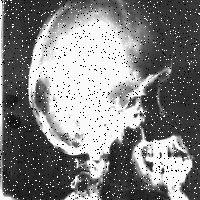

Después del filtro:



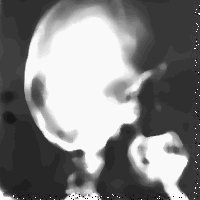

Imagen data/mamograma.png

Antes del filtro:



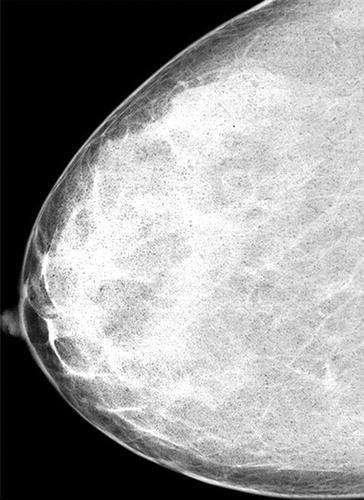

Después del filtro:



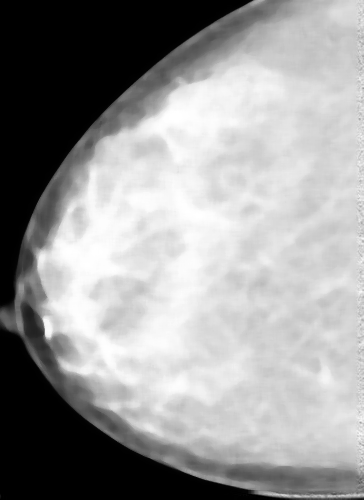

Imagen data/torax.png

Antes del filtro:



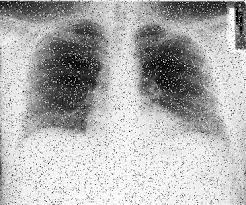

Después del filtro:



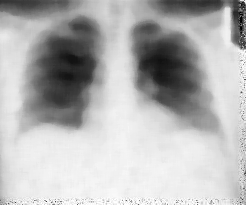

Imagen data/Zona-de-Looser.png

Antes del filtro:



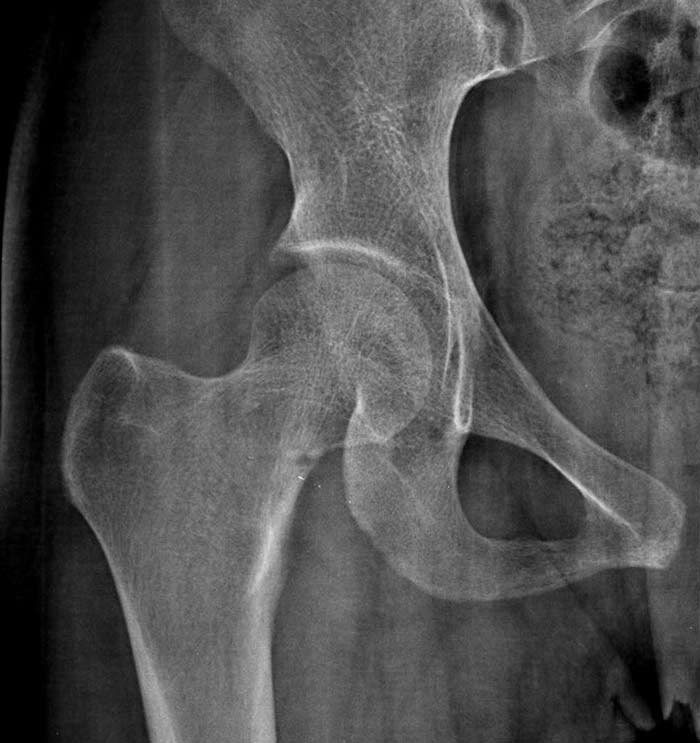

Después del filtro:



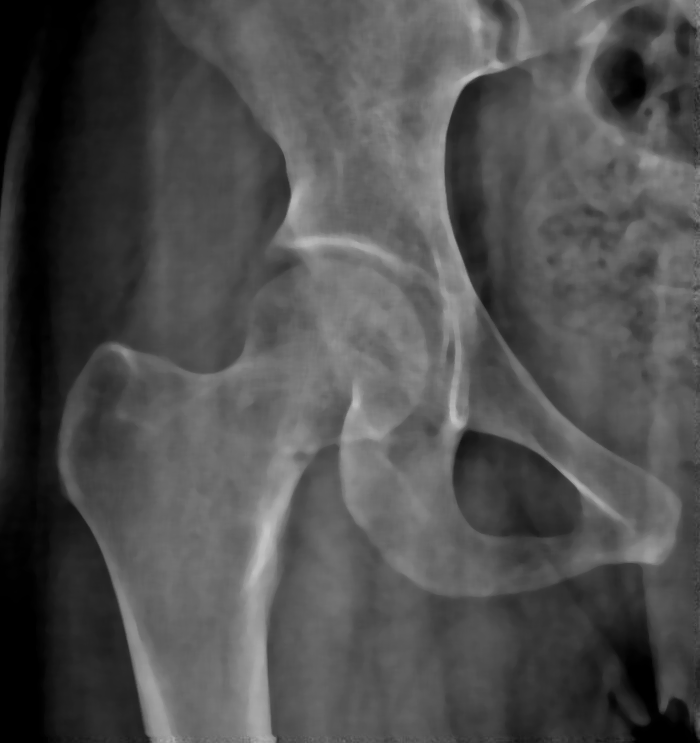

In [18]:
for r in radiografias: filtroDeMediana("data/" + r, 9, 9)

Todo esto demostrando que, dependiendo del nivel de ruido y la zona anatómica del cuerpo tomada, el filtro de sal y pimienta asiste mucho a mejorar la confianza en diagnóstico clínico, pero debe tener su parámetro de resolución de máscara ajustable para que el profesional de la salud, pueda ajustar la corrección de acuerdo a sus necesidades.